In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad("/icto/user/yc27616/data-home/Ptbp1/KPTracer-Data/KPTracer-Data/expression/adata_processed.nt.h5ad")

/home/yc27616/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yc27616/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_utils.py:431: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/home/yc27616/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yc27616/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


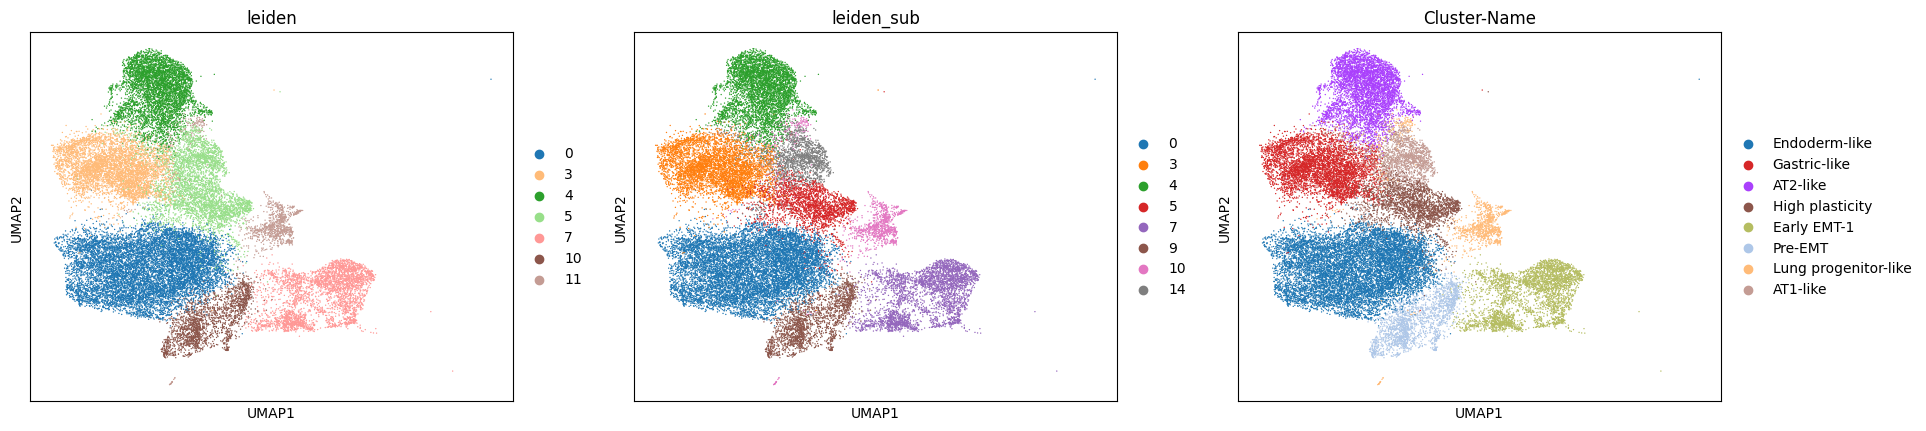

In [3]:
#提取细胞亚型
subtype = adata[adata.obs['Cluster-Name'].isin([
    "AT2-like", "AT1-like", "Gastric-like", 
    "High plasticity", "Lung progenitor-like", 
    "Endoderm-like", "Early EMT-1", "Pre-EMT"
])]
#可视化
sc.pl.umap(subtype, color=['leiden', 'leiden_sub',"Cluster-Name"])


In [4]:
subtype

AnnData object with n_obs × n_vars = 30878 × 27998
    obs: 'TS_Present', 'RNA_Present', 'MULTI', 'TS_UMI', 'NUM_INTBC', 'Lane', 'Tumor', 'SubTumor', 'ES_clone', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'n_counts', 'leiden_sub', 'Cluster-Name'
    uns: 'Cluster-Name_colors', 'Lane_colors', 'leiden', 'leiden_colors', 'neighbors', 'leiden_sub_colors'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
adata =subtype

In [6]:
adata

AnnData object with n_obs × n_vars = 30878 × 27998
    obs: 'TS_Present', 'RNA_Present', 'MULTI', 'TS_UMI', 'NUM_INTBC', 'Lane', 'Tumor', 'SubTumor', 'ES_clone', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'n_counts', 'leiden_sub', 'Cluster-Name'
    uns: 'Cluster-Name_colors', 'Lane_colors', 'leiden', 'leiden_colors', 'neighbors', 'leiden_sub_colors'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

## Preprocess the Data

In [7]:
# # Basic preprocessing
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=3)

# # Normalize the data
# sc.pp.normalize_total(adata, target_sum=1e4)

# # Logarithmize the data
# sc.pp.log1p(adata)

# # Find highly variable genes
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

# # Subset to highly variable genes
# adata = adata[:, adata.var['highly_variable']]

# # Regress out unwanted sources of variation (optional)
# #sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

# # Scale the data
# sc.pp.scale(adata, max_value=10)


## Dimensionality Reduction

In [8]:
sc.tl.pca(adata, svd_solver='arpack')

## Compute Neighbors

In [9]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

## Clustering

In [10]:
#sc.tl.leiden(adata, resolution=0.5)

## Perform PAGA

In [11]:
#print(adata.obs['Cluster-Name'].dtype)
#adata.obs['Cluster-Name'] = adata.obs['Cluster-Name'].astype('category')
sc.tl.paga(adata, groups='Cluster-Name')

/home/yc27616/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


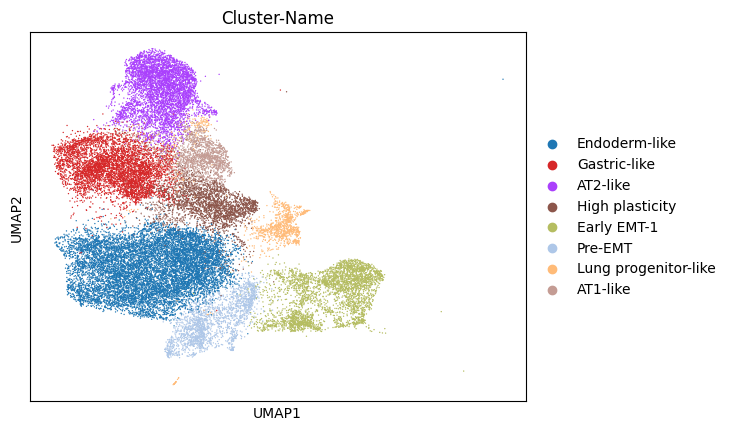

In [12]:
sc.pl.umap(adata, color=['Cluster-Name'])
#print(adata.obs['n_counts'])

## Visualize PAGA Graph

In [13]:
sc.pl.paga(adata, plot=False)  # `plot=False` ensures it just computes and stores positions without showing the plot

In [14]:
# UMAP embedding
sc.tl.umap(adata, init_pos='paga')

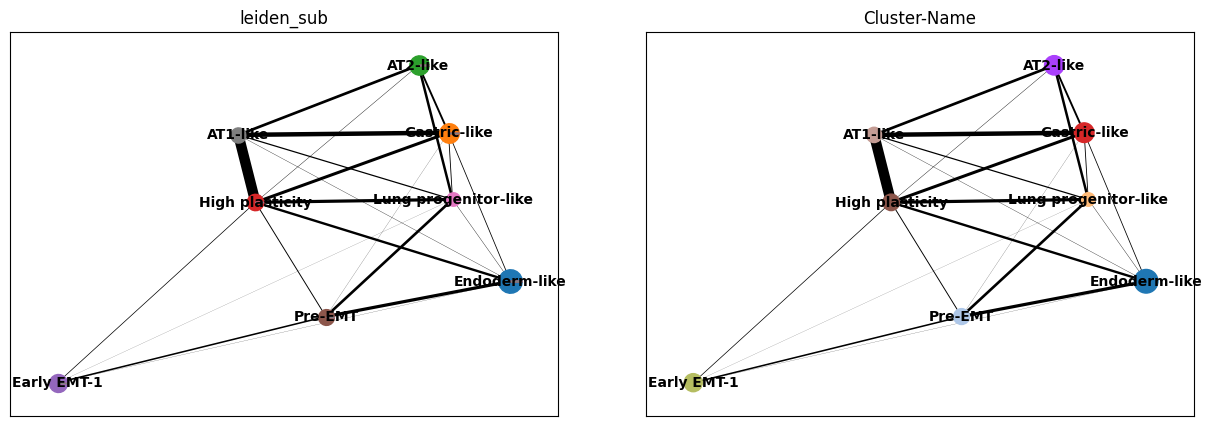

In [15]:
# Plot UMAP with PAGA overlay
sc.pl.paga(adata, color=['leiden_sub', 'Cluster-Name'])

/home/yc27616/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


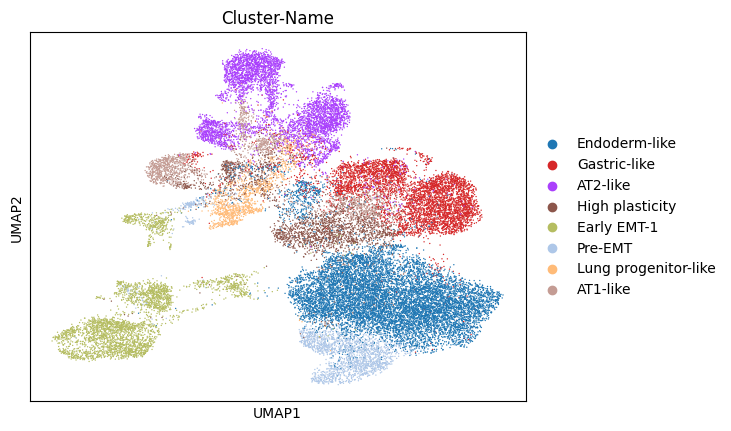

In [16]:
# Visualize UMAP embedding alone
sc.pl.umap(adata, color=['Cluster-Name'])

## Infer Trajectory

In [17]:
# Define the root cluster for the trajectory (e.g., cluster '0')
#adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_sub'] == '0')[0]

#adata.uns['iroot'] = np.flatnonzero(adata.obs['Cluster-Name'] == 'Early EMT-1')[0]

#cell_id = 'L28.ATCTACTTCTAAGCCA-1'
#cell_id = 'L6.CCCTCCTCAGCTGCTG-1'
#cell_id = 'L37.CGTTAGAAGAATGTGT-1'
#cell_id = 'L31.TCACAAGGTACAGCAG-1'
cell_id = 'L28.AGTGGGACACTGTCGG-1'
cell_idx = np.flatnonzero(adata.obs.index == cell_id)[0]
adata.uns['iroot'] = cell_idx

cell_idx

781

In [18]:
# Compute Diffusion Map
sc.tl.diffmap(adata)

In [19]:
# Compute DPT (Diffusion Pseudotime)
sc.tl.dpt(adata)

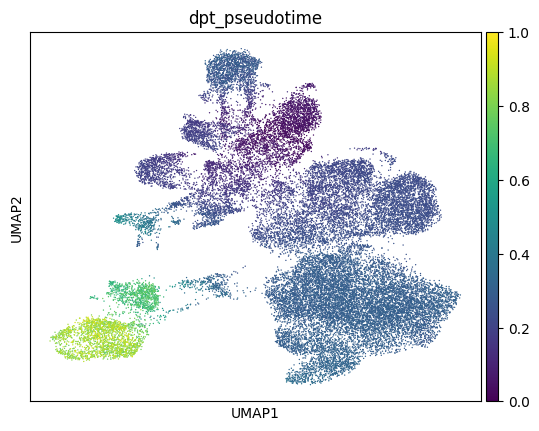

In [20]:
# Plot the trajectory
sc.pl.umap(adata, color=['dpt_pseudotime'])

## Save to local

In [21]:
adata.obs['dpt_pseudotime']

index
L10.AAGACCTCATGGATGG-1    0.759694
L10.AAGGAGCGTACGAAAT-1    0.813089
L10.ACGGAGAGTCAACTGT-1    0.466009
L10.ACTTTCAGTGATGTCT-1    0.695581
L10.AGCTCCTTCACTCCTG-1    0.707616
                            ...   
L9.TCGGTAATCATAGCAC-1     0.154602
L9.TCTTCGGTCGGTCTAA-1     0.146305
L9.TCTTTCCGTGCTAGCC-1     0.034910
L9.TGCACCTAGAAGGGTA-1     0.188655
L9.TGTGTTTCATCCCATC-1     0.194883
Name: dpt_pseudotime, Length: 30878, dtype: float32

In [22]:
# old
#adata.obs['dpt_pseudotime']

In [23]:
# Save pseudotime to local csv
# adata.obs['dpt_pseudotime'].to_csv('new_paga_pseudotime.csv')
adata.obs['dpt_pseudotime'].to_csv('PAGA.new_paga_pseudotime.L28.AGTGGGACACTGTCGG-1.3430.T2.csv')